Support Vector Regression in Python Using Scikit-Learn
Dhiraj K
https://heartbeat.fritz.ai/support-vector-regression-in-python-using-scikit-learn-89cc18e933b7

This article has few details on the parameter, the context of the problem, and the explaination of the SVR algorithem itself.

Also there is no feature engineering.

The evaluation just report RMSE from y_test vs y_pred. This could be improved with k-fold cross validation.


I add visualization by using snippets from "SVR in 6 Steps" article: https://medium.com/pursuitnotes/support-vector-regression-in-6-steps-with-python-c4569acd062d




In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('https://github.com/dhirajk100/SVR/raw/master/Support-Vector-Regression-Data.csv')

In [ ]:
df.head()

,x,y
0,168.181818,160.840244
1,187.878788,159.413657
2,207.575758,157.136809
3,227.272727,159.357847
4,246.969697,157.542862


In [ ]:
x = df.x.values.reshape(-1,1)
y = df.y.values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)

In [ ]:
regressor = SVR()
regressor.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
y_pred

array([164.89505022, 161.29163299, 168.06426163, 171.60215513,
       160.1363546 , 162.02409034, 164.68576618, 170.63195718,
       159.88437504, 165.7327918 , 173.00225783, 163.84984997,
       173.05850919, 169.57616612, 160.0050163 , 159.86299289,
       160.66103426, 162.4154598 , 166.78478467, 170.21585727,
       160.28230073, 170.83529037, 172.5320615 , 162.81773095,
       163.43408651, 159.93794308, 170.42528525, 171.03465902,
       163.02182608, 172.40120251, 159.84470766, 171.22939785,
       159.83012466, 165.31375592, 166.36288474, 160.39814699,
       165.94255165, 163.64165205])

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rmse

1.8299539787308559

In [ ]:
import matplotlib.pyplot as plt

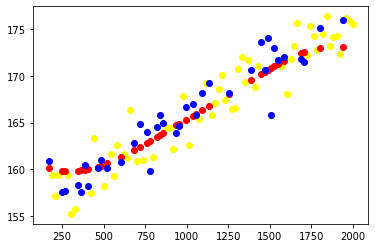

In [ ]:
plt.scatter(x_train, y_train, color='yellow') # Training data is yellow
plt.scatter(x_test, y_pred, color='red') # Prediction is red
plt.scatter(x_test, y_test, color='blue') # True/target is blue